In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [66]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [67]:
df_test

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


In [68]:
df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [70]:
df_train.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [71]:
df_train.drop(['person_age', 'id'], axis=1, inplace=True)
df_test.drop(['person_age', 'id'], axis=1, inplace=True)

In [72]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_income               58645 non-null  int64  
 1   person_home_ownership       58645 non-null  object 
 2   person_emp_length           58645 non-null  float64
 3   loan_intent                 58645 non-null  object 
 4   loan_grade                  58645 non-null  object 
 5   loan_amnt                   58645 non-null  int64  
 6   loan_int_rate               58645 non-null  float64
 7   loan_percent_income         58645 non-null  float64
 8   cb_person_default_on_file   58645 non-null  object 
 9   cb_person_cred_hist_length  58645 non-null  int64  
 10  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 4.9+ MB


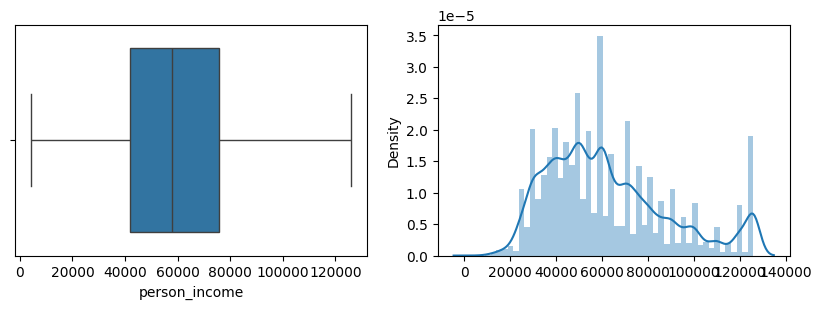

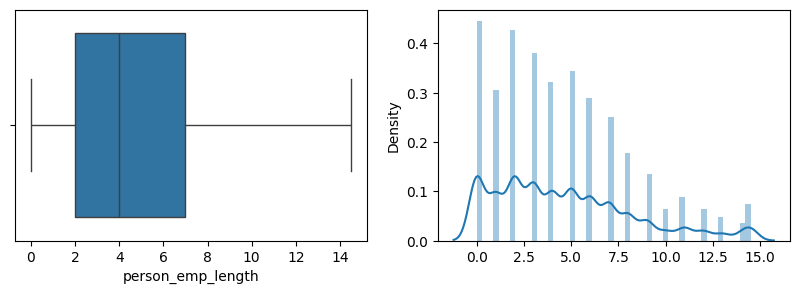

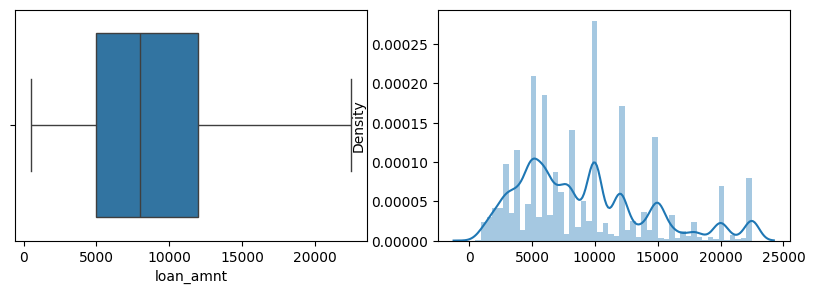

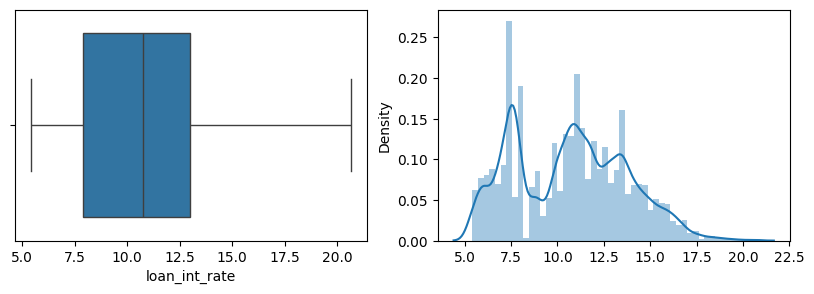

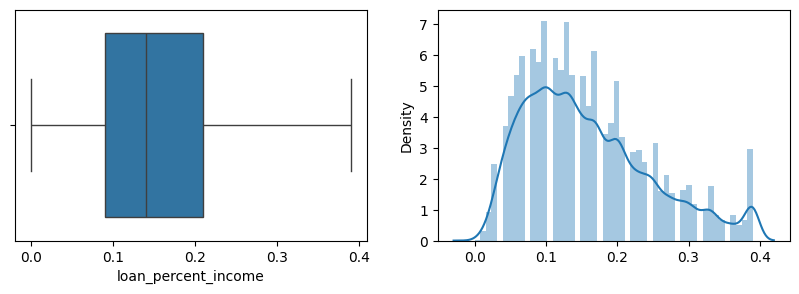

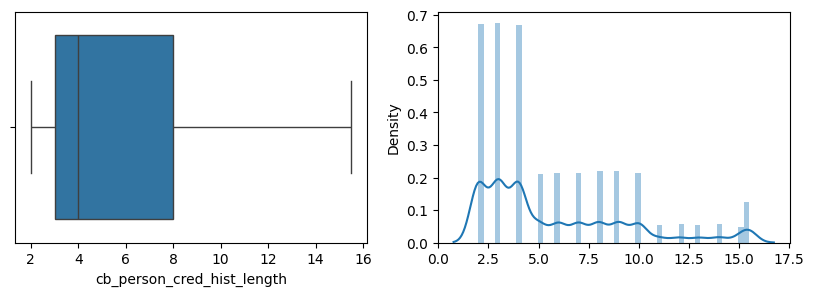

In [73]:
outlier_list = ['person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
# outlier_columns = ['Evaporation', 'Rainfall', 'WindSpeed9am', 'WindSpeed3pm', 'Cloud9am', 'Cloud3pm']

for i in outlier_list:
    percent25 = df_train[i].quantile(0.25)
    percent75 = df_train[i].quantile(0.75)

    iqr = percent75 - percent25
    upper = percent75 + 1.5 * iqr
    lower = percent25 - 1.5 * iqr
    
    df_train[i] = np.where(
    df_train[i] > upper,
    upper,
    np.where(
    df_train[i] < lower,
    lower,
    df_train[i]))
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df_train[i])

    plt.subplot(1, 2, 2)
    sns.distplot(x=df_train[i])

In [74]:
x = df_train.drop(['loan_status'], axis=1)
y = df_train['loan_status']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape

((46916, 10), (11729, 10))

In [75]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_income               58645 non-null  float64
 1   person_home_ownership       58645 non-null  object 
 2   person_emp_length           58645 non-null  float64
 3   loan_intent                 58645 non-null  object 
 4   loan_grade                  58645 non-null  object 
 5   loan_amnt                   58645 non-null  float64
 6   loan_int_rate               58645 non-null  float64
 7   loan_percent_income         58645 non-null  float64
 8   cb_person_default_on_file   58645 non-null  object 
 9   cb_person_cred_hist_length  58645 non-null  float64
dtypes: float64(6), object(4)
memory usage: 4.5+ MB


In [103]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
numeric_features = ['person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical_features = ['person_home_ownership', 'loan_grade', 'cb_person_default_on_file', 'loan_intent']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Keep other columns as is
)

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

model = XGBClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

np.random.seed(42)

# Setup random hyperparamer search for logisticregression
xg_log_reg = RandomizedSearchCV(model, param_distributions=param_grid, cv=5, n_iter=20, verbose=True)

clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', xg_log_reg)])

# Train the model
clf_pipeline.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat', OneHotEncoder(),
                                                  ['person_home_ownership',
                                                   'loan_grade',
                                                   'cb_person_default_on_file',
                                                   'loan_intent'])])),
                ('classifier...
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=None, ...),
                                    n_iter=20,
                                    param_distributions={'colsample_bytree': [0.6,
                                                                              0.8,
                                                                              1.0],
                                                         'gamma': [0, 0.1, 0.2],
                                                         'learning_rate': [0.01,
                                                                           0.1,
                                                                           0.2],
                                                         'max_depth': [3, 5, 7],
                                                         'min_child_weight': [1,
                                                                              3,
                                                                              5],
                                                         'n_estimators': [100,
                                                                          200,
                                                                          300],
                                                         'subsample': [0.6, 0.8,
                                                                       1.0]},
                                    verbose=True))])

In [105]:
# model = XGBClassifier(
#     colsample_bytree=0.8, 
#     learning_rate=0.1, 
#     max_depth=7, 
#     n_estimators=50, 
#     subsample=1.0
# )
# clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                # ('pca', PCA(n_components=0.95)), 
#                               ('modeling', model)])
# clf_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat', OneHotEncoder(),
                                                  ['person_home_ownership',
                                                   'loan_grade',
                                                   'cb_person_default_on_file',
                                                   'loan_intent'])])),
                ('modeling',...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [106]:
df = pd.read_csv('test.csv')

In [112]:
from sklearn.metrics import accuracy_score
preds = clf_pipeline.predict(x_test)
accuracy_score(preds, y_test)

0.9548128570210589

In [113]:
test_preds = clf_pipeline.predict(df_test)

In [114]:
test_preds

array([1, 0, 1, ..., 0, 0, 1])

In [115]:
prob_predictions = clf_pipeline.predict_proba(df_test)[:, 1]
prob_predictions

array([0.98890173, 0.01778465, 0.59058857, ..., 0.0091044 , 0.19672567,
       0.959285  ], dtype=float32)

In [116]:
sub_dataframe =  pd.DataFrame({
    'id': df['id'],
    'loan_status': prob_predictions
})

In [117]:
sub_dataframe

,id,loan_status
0,58645,0.988902
1,58646,0.017785
2,58647,0.590589
3,58648,0.006681
4,58649,0.076629
...,...,...
39093,97738,0.062313
39094,97739,0.007442
39095,97740,0.009104
39096,97741,0.196726


In [118]:
sub_dataframe.to_csv('submission.csv', index=False)